In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
def load_data(filepath):
    data = np.loadtxt(filepath, delimiter=',', skiprows=1)
    X = data[:, 0].reshape(-1, 1)
    y = data[:, 1]
    return X, y


In [4]:
def expand_polynomial_features(X, degree):
    return np.hstack([X**i for i in range(1, degree+1)])

In [5]:
def add_bias(X):
    return np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

In [7]:

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y)**2)
    return cost

In [8]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    for _ in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * X.T.dot(errors)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

In [9]:
def train_linear_regression(X_train, y_train, alpha=0.01, num_iters=500):
    X_train_bias = add_bias(X_train)
    theta = np.zeros(X_train_bias.shape[1])
    theta, cost_history = gradient_descent(X_train_bias, y_train, theta, alpha, num_iters)
    return theta, cost_history

def predict(X, theta):
    X_bias = add_bias(X)
    return X_bias.dot(theta)

In [11]:
X, y = load_data('data_02b.csv')

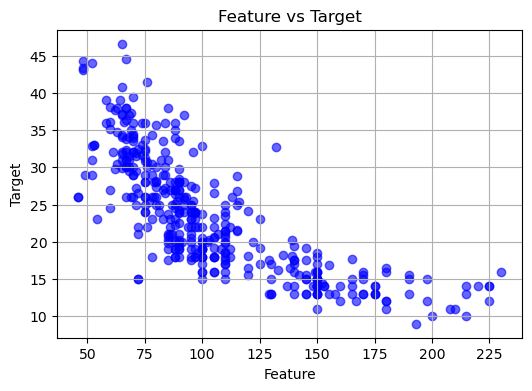

In [12]:
# --- Plot Feature vs Target ---
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', alpha=0.6)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Feature vs Target')
plt.grid(True)
plt.show()

In [ ]:
#Polynomial Regression

degrees = [1, 2, 3]
models = []
train_errors_list = []
val_errors_list = []
train_cost_histories = []
val_cost_histories = []

In [14]:
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / (std + 1e-8)
    return X_norm, mean, std


for degree in degrees:
    # Expand features
    X_train_poly = expand_polynomial_features(X_train_full, degree)
    X_val_poly = expand_polynomial_features(X_val_full, degree)

    # Normalize features
    X_train_poly, mean, std = normalize_features(X_train_poly)
    X_val_poly = (X_val_poly - mean) / (std + 1e-8)

    # Train model
    theta, train_cost_history = train_linear_regression(X_train_poly, y_train_full, alpha=0.01, num_iters=500)
    models.append(theta)
    train_cost_histories.append(train_cost_history)

    # Predict on training and validation
    preds_train = predict(X_train_poly, theta)
    preds_val = predict(X_val_poly, theta)

    # Compute final errors
    train_error = compute_cost(add_bias(X_train_poly), y_train_full, theta)
    val_error = compute_cost(add_bias(X_val_poly), y_val_full, theta)

    train_errors_list.append(train_error)
    val_errors_list.append(val_error)


In [21]:
# --- Find Best Model ---
best_index = np.argmin(val_errors_list)
best_degree = degrees[best_index]
best_theta = models[best_index]

print(f"\n✅ Best Polynomial Degree: {best_degree}")
print(f"✅ Learned Parameters (theta):")
for i, param in enumerate(best_theta):
    print(f"    θ{i}: {param:.5f}")


✅ Best Polynomial Degree: 1
✅ Learned Parameters (theta):
    θ0: nan
    θ1: nan


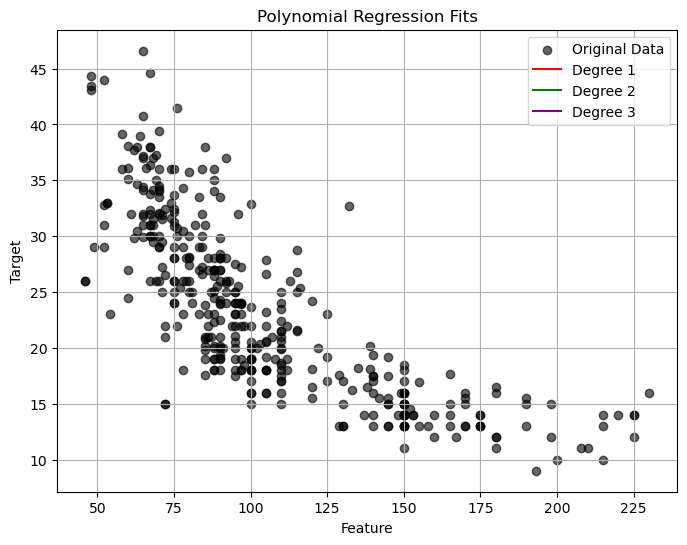

In [27]:
# Ensure that x_curve spans the entire feature range for smooth fitting
x_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', label='Original Data', alpha=0.6)

colors = ['red', 'green', 'purple']

# Loop over degrees and plot the corresponding regression curves
for i, degree in enumerate(degrees):
    # Expand the x_curve for the current polynomial degree
    X_curve_poly = expand_polynomial_features(x_curve, degree)
    # Get the predictions (fitted values)
    y_curve = predict(X_curve_poly, models[i])
    
    # Plot the polynomial regression curve for the current degree
    plt.plot(x_curve, y_curve, color=colors[i], label=f'Degree {degree}')

# Adding labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression Fits')

# Show the legend
plt.legend()

# Enable grid for better readability
plt.grid(True)

# Show the plot
plt.show()


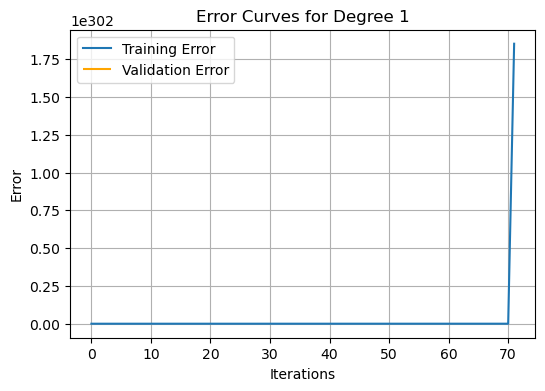

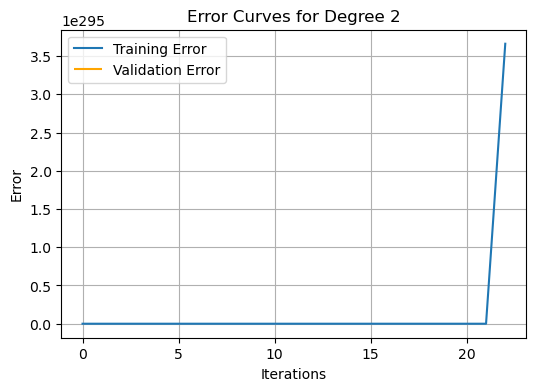

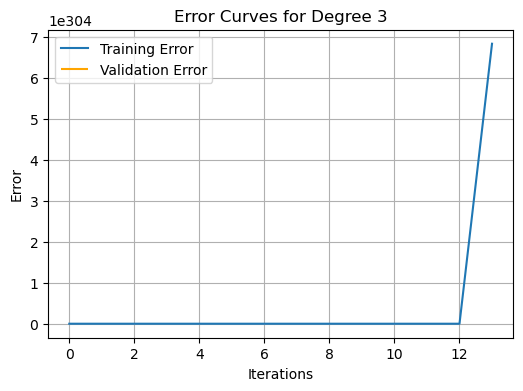

In [28]:

for i, degree in enumerate(degrees):
    plt.figure(figsize=(6, 4))
    plt.plot(train_cost_histories[i], label='Training Error')
    plt.hlines(val_errors_list[i], xmin=0, xmax=len(train_cost_histories[i]), colors='orange', label='Validation Error')
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title(f'Error Curves for Degree {degree}')
    plt.legend()
    plt.grid(True)
    plt.show()